<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Hf_Fine_Tunning_BERT_Custom_Data_Set_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### **Huggingface: Fine Tunning BERT using Custom Data Set**



**Learning Objectives**

At the end of the experiment you will be able to understand  :

* How to load & convert any custom dataset into a HF datasets
* Trainer and trainingArguments objects
* Computing Metrics
* Saving and loading the trained model

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304145" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7892449987" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import re
ipython = get_ipython()

notebook= "U4W20_72_Hf_Fine_Tunning_BERT_Custom_Data_Set_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [4]:
# @title Download dataset
!pip install --upgrade gdown
!gdown "1JlNQOwHcWiq7pubASjs8XaGP0feuK2_E"

Downloading...
From: https://drive.google.com/uc?id=1JlNQOwHcWiq7pubASjs8XaGP0feuK2_E
To: /content/Tweets.csv
100% 3.42M/3.42M [00:00<00:00, 124MB/s]


## Importing packages

Accelerate is a library that enable the same Pytorch code to run accross any distributed configuration by adding just four lines of code, making training and interface at scale made simple, efficient and adaptable.

In [5]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


Huggingface dataset library

In [6]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

### **Loading the Custom Data**

In [8]:
# Read CSV file
df_ = pd.read_csv('/content/Tweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
 # YOUR CODE HERE: Select the respective columns to identify the sentiment of text
 df_.drop(['tweet_id','name','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)

In [10]:
# YOUR CODE HERE: Plot the histogram and check the ratio of split amongst sentiment
df_.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,negativereason_gold,text
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,@VirginAmerica and it's a really big bad thing...


<ipython-input-11-99cc8592db81>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='airline_sentiment', data=df_, palette='Set2')


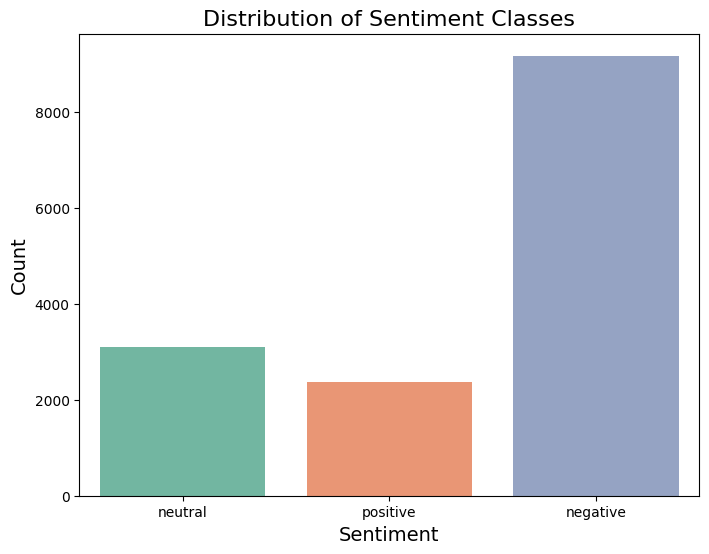

Sentiment Split Ratio:
 airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: proportion, dtype: float64


In [11]:
# Set plot size
plt.figure(figsize=(8, 6))

# Plotting the sentiment distribution using seaborn
sn.countplot(x='airline_sentiment', data=df_, palette='Set2')

# Adding labels and title with matplotlib
plt.title('Distribution of Sentiment Classes', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

# Check the ratio of the split amongst sentiment
sentiment_ratio = df_['airline_sentiment'].value_counts(normalize=True)
print("Sentiment Split Ratio:\n", sentiment_ratio)

In [12]:
#  removal special characters

invalid_characters = "!@#$%^&*()_+[]{}|;:',.<>?/"

def clean_characters (text):
  clean_text=""
  for k in text:
    for i in k:
      if i not in invalid_characters:
        clean_text+=i

  return clean_text

In [13]:
df_['text'] = df_['text'].map(clean_characters)



In [14]:
len(df_['text'])

14640

In [15]:
# create an word2vec represatuion
import gensim
from IPython import get_ipython
import re
ipython = get_ipython()
ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp2/AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin")
# initate with data cleaning
model = gensim.models.KeyedVectors.load_word2vec_format('AIML_DS_GOOGLENEWS-VECTORS-NEGATIVE-300_STD.bin', binary=True, limit=500000)



In [16]:
word2vec_vector_size = 300

'''
 This method converts documents to word vectors. It first checks if the word is valid according to our initial frequency
 threshold. Next, if it is, we add the precomputed word vectors together. If the word is valid, but we do not have a valid
 vector to represent the word, we add a random gaussian noise instead. Since we do not want to induce new noise each time,
 we store the same noise vector for training and test time in substitute_word_vecs variable.
'''
def convert_to_w2v(dataset, number_of_documents, substitute_word_vecs={}):
    d = {}
    labels = np.zeros((number_of_documents, 1))
    w2v_rep = np.zeros((number_of_documents, word2vec_vector_size))

    # Iterate over the dataset and split into words
    i = 0
    for index, data in enumerate(dataset):
            text = ' '.join(data).split(' ')
            valid_count = 1
            for word in text:

                # Check if word is valid or not according to original dataset pruning
                    try:
                        w2v_rep[i] += model[word]
                        # YOUR CODE HERE. For each 'word' variable above, get a word2vec representation using the model
                        #..loaded above within 'model'
                        d[word] = model[word]
                    except:
                        '''The word isn't in our pretrained word-vectors, hence we add a random gaussian noise
                         to account for this. We store the random vector we assigned to the word, and reuse
                         the same vector during test time to ensure consistency.'''

                        if word not in substitute_word_vecs.keys():
                            substitute_word_vecs[word] = np.random.normal(-0.25, 0.25, word2vec_vector_size)

                        w2v_rep[i] += substitute_word_vecs[word]

                    valid_count += 1

            # Average
            w2v_rep[i] = w2v_rep[i] / valid_count

            # Save label
            labels[i] = index

            i += 1

    return d, w2v_rep, labels, substitute_word_vecs

In [17]:
a,w2v_rep,c,d = convert_to_w2v(df_['text'],len(df_['text']))

In [18]:
#  for target coloums lets use autoencoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

array([1, 2, 0])

In [19]:
target_map = le.fit_transform(df_['airline_sentiment'])
# YOUR CODE HERE : Convert the characters to numeric
df_['target'] = target_map

df_['target'].unique()

array([1, 2, 0])

In [20]:
# Assign to new object and rename the column names
df2 = df_[['text','target']]
df2.columns=['sentence','label']

# YOUR CODE HERE : Save the csv file

df2.to_csv('latest_data.csv',index=False)

In [21]:
!head latest_data.csv

sentence,label
VirginAmerica What dhepburn said,1
VirginAmerica plus youve added commercials to the experience tacky,2
VirginAmerica I didnt today Must mean I need to take another trip,1
"VirginAmerica its really aggressive to blast obnoxious ""entertainment"" in your guests faces amp they have little recourse",0
VirginAmerica and its a really big bad thing about it,0
"VirginAmerica seriously would pay 30 a flight for seats that didnt have this playing
its really the only bad thing about flying VA",0
VirginAmerica yes nearly every time I fly VX this “ear worm” won’t go away ,2
VirginAmerica Really missed a prime opportunity for Men Without Hats parody there httpstcomWpG7grEZP,1


In [22]:
!pip install datasets

### **Finally conveting the data.csv into HF dataset**

In [23]:
# load the dataset through HF transformer library dataset
from datasets import load_dataset


raw_dataset = load_dataset('csv', data_files='latest_data.csv')
# YOUR CODE HERE: Load the csv file

Generating train split: 0 examples [00:00, ? examples/s]

In [24]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

In [25]:
split = raw_dataset['train'].train_test_split(test_size=0.2)

train_dataset= split['train']
test_dataset = split['test']

### **Tokenizing**

In [26]:
# creating checkpoint of bert model
checkpoint = 'distilbert-base-cased'

In [27]:
from transformers import AutoTokenizer

In [28]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint,clean_up_tokenization_spaces=True)
 # YOUR CODE HERE: Initilize the tokenizer from pretrianed model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

By calling the map method and passing in a tokenize function, the dataset library automatically apply the same function to every train and test set.

*Note*: In this example, we appllied only truncation but not padding or conversion into Pytorch tensor. This will be handled by the trainer object, created later.

In [29]:
def tokenize_fn(batch):
  return tokenizer(batch['sentence'],truncation = True)

In [30]:
tokenized_datasets = split.map(tokenize_fn, batched=True)
# YOUR CODE HERE: Map the above function to every batch of the data.

Map:   0%|          | 0/11712 [00:00<?, ? examples/s]

Map:   0%|          | 0/2928 [00:00<?, ? examples/s]

In [31]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 11712
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2928
    })
})

### **Defining Model**

In [32]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

*Note:* The checkpoint we pass here in must match the checkpoint we passed in tokenizer. so, we get right tokenizers for the model.

In [33]:
# AutoModelForSequenceClassification is used to get a text classification model from the checkpoint.
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
!pip install torchinfo

In [35]:
# YOUR CODE HERE : To display summary
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                  Param #
DistilBertForSequenceClassification                     --
├─DistilBertModel: 1-1                                  --
│    └─Embeddings: 2-1                                  --
│    │    └─Embedding: 3-1                              22,268,928
│    │    └─Embedding: 3-2                              393,216
│    │    └─LayerNorm: 3-3                              1,536
│    │    └─Dropout: 3-4                                --
│    └─Transformer: 2-2                                 --
│    │    └─ModuleList: 3-5                             42,527,232
├─Linear: 1-2                                           590,592
├─Linear: 1-3                                           2,307
├─Dropout: 1-4                                          --
Total params: 65,783,811
Trainable params: 65,783,811
Non-trainable params: 0

### **Training Arguments**

TrainingArguments is the subset of the arguments we use in our example scripts **which relate to the training loop
itself**.

In [36]:
training_args = TrainingArguments(
    # YOUR CODE HERE: To initilise the training arguments with required parameters
    "wing_model",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    num_train_epochs=5
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


### **Metrics**

In [37]:
import numpy as np
from sklearn.metrics import f1_score,accuracy_score

def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions =np.argmax(logits,axis=-1)
  acc= accuracy_score(labels,predictions)
  # YOUR CODE HERE: return accruacy
  f1= f1_score(labels, predictions, average='weighted')
  # YOUR CODE HERE: return F1 score
  return {'accuracy':acc, 'f1':f1}

### **Training**

In [38]:
trainer = Trainer(
    model, # pre-trained model
    training_args, # training arguments
    train_dataset=tokenized_datasets["train"], # the data use for training
    eval_dataset = tokenized_datasets["test"], # the data use for evaluation
    tokenizer = tokenizer, # The tokenizer to preprocess the data.
    compute_metrics=compute_metrics # The function that will be used to compute metrics at evaluation
)

In [39]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.512500,0.497539,0.814549,0.803637
2,0.354000,0.537998,0.830943,0.828134
3,0.240400,0.734056,0.819672,0.820019
4,0.155100,0.906067,0.822746,0.818437
5,0.098900,0.992150,0.821038,0.818841


TrainOutput(global_step=7320, training_loss=0.2837165472937412, metrics={'train_runtime': 578.2539, 'train_samples_per_second': 101.27, 'train_steps_per_second': 12.659, 'total_flos': 568643007915648.0, 'train_loss': 0.2837165472937412, 'epoch': 5.0})

### **Loading the saved model**

In [40]:
# Save has done at the end of each epoch in training_dir
!ls training_dir

ls: cannot access 'training_dir': No such file or directory


In [41]:
from transformers import pipeline

In [42]:
my_model = pipeline('text-classification',model='wing_model/checkpoint-7320',device=0)
# YOUR CODE HERE : choose the pipeline and load the model checkpoint.

### **Testing**

In [43]:
test_pred = my_model(split['test']['sentence'])
# YOUR CODE HERE : Pass the test sentence data to model

In [44]:
for d in test_pred:
  print(d)
  break

{'label': 'LABEL_2', 'score': 0.9984632730484009}


In [45]:
# YOUR CODE HERE : get the label from the pridictions
def get_label(d):
  return int(d['label'].split('_')[1])

# Append it to the test_pred
test_pred =[get_label(d) for d in test_pred]

In [46]:
# YOUR CODE HERE: To print the accuracy
print("accuracy : ", accuracy_score(split['test']['label'], test_pred))

accuracy :  0.8210382513661202


### Please answer the questions below to complete the experiment:




In [ ]:
#@title Select True or False: In the context of the BERT model that we have implemented, tokenization is just word-level separation from sentences? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE", "FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8719
Date of submission:  20 Oct 2024
Time of submission:  20:23:30
View your submissions: https://aiml-iiith.talentsprint.com/notebook_submissions
